<a href="https://colab.research.google.com/github/AlisaAlenteva/Iscusstvennye_neyronne_seti/blob/main/3_%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

## 1.1. Устанавливаем необходимые зависимости

In [ ]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential
 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
 
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np
import keras

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [ ]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

trainX = trainX / 255
testX = testX / 255

trainy = keras.utils.to_categorical(trainy, 10)
testy = keras.utils.to_categorical(testy, 10)

trainX = np.expand_dims(trainX, axis=3)
testX = np.expand_dims(testX, axis=3)


print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

print(trainy.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train: X =  (60000, 28, 28, 1)
Test: X =  (10000, 28, 28, 1)
(60000, 10)


## 1.3. Визуализируем часть данных из датасета

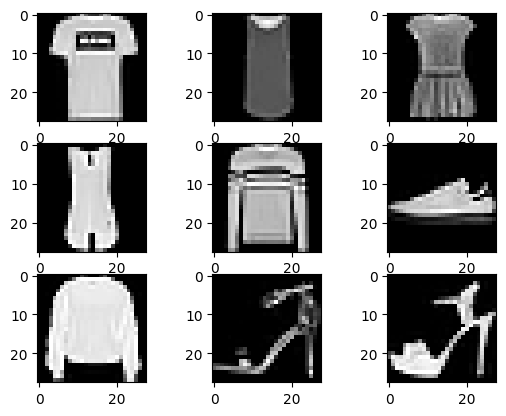

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
 
plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

## 1.5. Обучаем модель

In [ ]:
EPOCH = 3

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


history = model.fit(trainX, trainy, batch_size=64, epochs=EPOCH, validation_split=0.2)
 
model.evaluate(testX, testy)

Epoch 1/3
750/750 [==============================] - 109s 139ms/step - loss: 0.4483 - accuracy: 0.8406 - val_loss: 0.3442 - val_accuracy: 0.8806
Epoch 2/3
750/750 [==============================] - 84s 112ms/step - loss: 0.2910 - accuracy: 0.8946 - val_loss: 0.2918 - val_accuracy: 0.8961
Epoch 3/3
313/313 [==============================] - 7s 22ms/step - loss: 0.2709 - accuracy: 0.9016


[0.27093297243118286, 0.9016000032424927]

## 1.6. Анализируем обученную модель. Строим график (графики) обучения

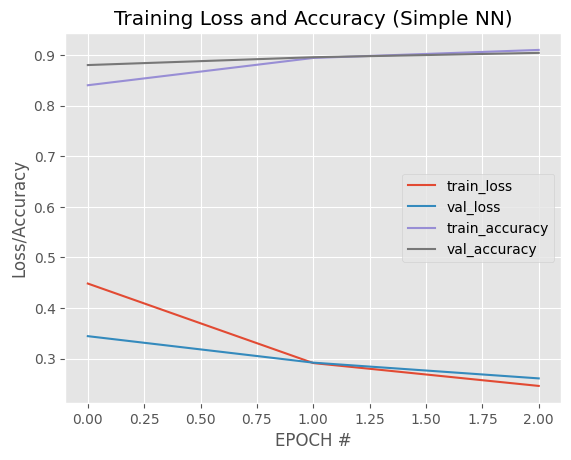

In [ ]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("EPOCH #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

from google.colab import files
uploaded = files.upload() 



image = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE) 
image = cv2.resize(image, (28, 28)) 
# image = cv2.bitwise_not(image)
orig = image
image = image.reshape(-1, 28, 28, 1) 

cv2_imshow(orig)

Saving 60f02fb383267508f54d8e8cc6503b41.jpg to 60f02fb383267508f54d8e8cc6503b41.jpg


In [ ]:
preds = model.predict(image)
print(preds)

1/1 [==============================] - 0s 179ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [ ]:
i = preds.argmax(axis=1)[0]
lab = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

label = lab[i]
print(f"Загружено: { label, preds}")

Загружено: ('Shirt', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))


### 1.8. Второе изображение

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

from google.colab import files
uploaded = files.upload() 



image = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE) 
image = cv2.resize(image, (28, 28)) 
# image = cv2.bitwise_not(image)
orig = image
image = image.reshape(-1, 28, 28, 1) 

cv2_imshow(orig)

Saving Hdb92d0d1d35a410b8032c21fa8e8b5c6r.webp to Hdb92d0d1d35a410b8032c21fa8e8b5c6r.webp


In [ ]:
preds = model.predict(image)
print(preds)

1/1 [==============================] - 0s 32ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
i = preds.argmax(axis=1)[0]
lab = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

label = lab[i]
print(f"Загружено: { label, preds}")

Загружено: ('Trouser', array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


# Задание 2

## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений

### Модель

#### Датасет

In [ ]:
import matplotlib
matplotlib.use("Agg")

In [ ]:
# Подключаем необходимые модули и пакеты
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,  AveragePooling2D
 
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np
import keras

### Датасет

In [ ]:
# инициализируем данные и метки
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [ ]:
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/датасеты/")))

random.shuffle(imagePaths)

In [ ]:
# цикл по изображениям
for imagePath in imagePaths:
	
	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32))# меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																								# сглаживаем его в 32x32x3=3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список мето

In [ ]:
# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
len(data)

2998

In [ ]:
# разбиваем данные на обучающую и тестовую выборки, используя 75%
# данных для обучения и оставшиеся 25% для тестирования
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [ ]:
# конвертируем метки из целых чисел в векторы (для 2х классов при
# бинарной классификации вам следует использовать функцию Keras
# "to_categorical" вместо "LabelBinarizer" из scikit-learn, которая не возвращает вектор)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)


In [ ]:
trainY.shape

(2248, 3)

In [ ]:
model_old = keras.Sequential([
    
    Conv2D(6, (3,3), strides=(1,1), activation='relu', padding = 'same',
    input_shape=(32,32,3)), 
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(16, (3,3), strides=(1,1), activation='relu', padding = 'same'), 
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),

    Flatten(),

    Dense(units=128,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=3,activation='softmax') 
])

model_old.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 6)         168       
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        880       
                                                                 
 average_pooling2d_1 (Averag  (None, 8, 8, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
EPOCH = 20

model_old.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


history = model_old.fit(trainX, trainY, batch_size=100, epochs=EPOCH, validation_split=0.15)
 
model_old.evaluate(testX, testY)

Epoch 1/20
20/20 [==============================] - 4s 107ms/step - loss: 1.0568 - accuracy: 0.4513 - val_loss: 1.0792 - val_accuracy: 0.3964
Epoch 2/20
20/20 [==============================] - 1s 69ms/step - loss: 1.0049 - accuracy: 0.4901 - val_loss: 0.9471 - val_accuracy: 0.5562
Epoch 3/20
20/20 [==============================] - 1s 71ms/step - loss: 0.9531 - accuracy: 0.5487 - val_loss: 0.9163 - val_accuracy: 0.5888
Epoch 4/20
20/20 [==============================] - 1s 68ms/step - loss: 0.9197 - accuracy: 0.5817 - val_loss: 0.8923 - val_accuracy: 0.5917
Epoch 5/20
20/20 [==============================] - 1s 70ms/step - loss: 0.9038 - accuracy: 0.5880 - val_loss: 0.8797 - val_accuracy: 0.6331
Epoch 6/20
20/20 [==============================] - 1s 67ms/step - loss: 0.8487 - accuracy: 0.6262 - val_loss: 0.8638 - val_accuracy: 0.6243
Epoch 7/20
20/20 [==============================] - 2s 87ms/step - loss: 0.8242 - accuracy: 0.6408 - val_loss: 0.9086 - val_accuracy: 0.6213
Epoch 8/20
2

[0.8172317743301392, 0.6626666784286499]

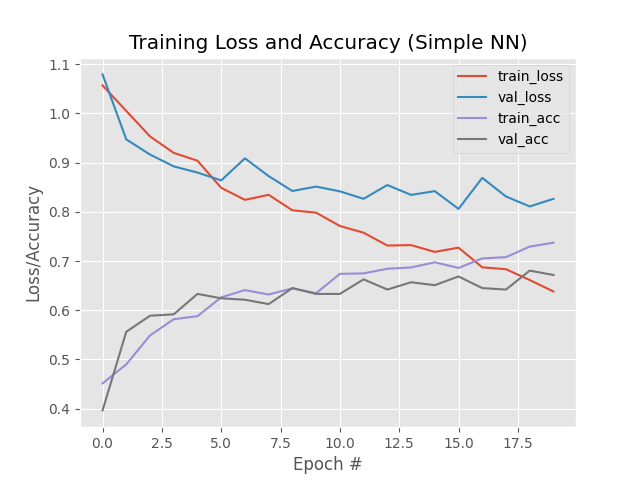

In [ ]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')
cv2_imshow(cv2.imread("plot.png"))

### Первое изображение

In [ ]:
from keras.models import load_model
import argparse
import pickle
import cv2

Saving kartinki-ovechki-17.jpg to kartinki-ovechki-17.jpg


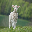

In [ ]:
# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files
uploaded = files.upload() 

# загружаем входное изображение, меняем его размер на необходимый и выводим его
image = cv2.imread(list(uploaded.keys())[0])
output = image.copy()
image = cv2.resize(image, (32, 32))
cv2_imshow(image)

In [ ]:
img_c = image.copy()

In [ ]:
import tensorflow as tf

In [ ]:
# image = np.expand_dims(image)
# preds = model_old.predict(image)


img_c = tf.expand_dims(image, axis=0)

In [ ]:
img_c.shape

TensorShape([1, 32, 32, 3])

In [ ]:
preds = model_old.predict(img_c)

1/1 [==============================] - 0s 104ms/step


In [ ]:
# находим индекс метки класса с наибольшей вероятностью
# соответствия
i = preds.argmax(axis=1)[0]
lab = ['Slony', 'Cow', 'Ovechka']
#lab = ['Слон', 'Корова', 'Овца']

label = lab[i]

In [ ]:
print(f"Загружено: { label, preds}")

Загружено: ('Ovechka', array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))


### Второе изображение

In [ ]:
from keras.models import load_model
import argparse
import pickle
import cv2

Saving svnsl2.jpg to svnsl2 (1).jpg


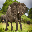

In [ ]:
# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files
uploaded = files.upload() 

# загружаем входное изображение, меняем его размер на необходимый и выводим его
image = cv2.imread(list(uploaded.keys())[0])
output = image.copy()
image = cv2.resize(image, (32, 32))
cv2_imshow(image)

In [ ]:
img_c = image.copy()

In [ ]:
import tensorflow as tf

In [ ]:
# image = np.expand_dims(image)
# preds = model_old.predict(image)


img_c = tf.expand_dims(image, axis=0)

In [ ]:
img_c.shape

TensorShape([1, 32, 32, 3])

In [ ]:
preds = model_old.predict(img_c)

Exception ignored in: <function _xla_gc_callback at 0x7f1fcf69caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


1/1 [==============================] - 0s 27ms/step


In [ ]:
# находим индекс метки класса с наибольшей вероятностью
# соответствия
i = preds.argmax(axis=1)[0]
lab = ['Slony', 'Cow', 'Ovechka']
#lab = ['Слон', 'Корова', 'Овца']

label = lab[i]

In [ ]:
print(f"Загружено: { label, preds}")

Загружено: ('Slony', array([[1., 0., 0.]], dtype=float32))


# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [ ]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

### 3.1.2. Отрисуйте несколько примеров

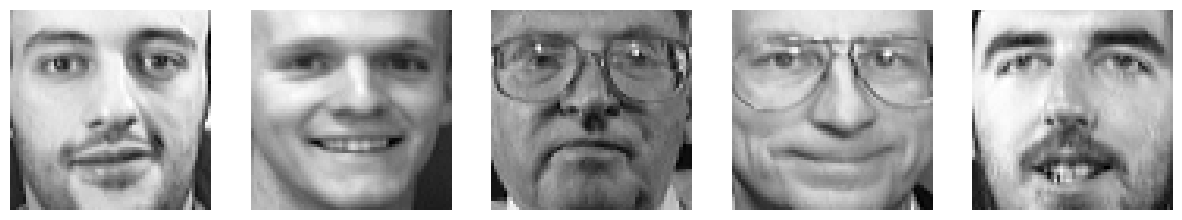

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')


Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [ ]:
n_pixels = train.shape[1]

# Upper half of the faces

X_train = train[:, :(n_pixels + 1) // 2, :]

# Lower half of the faces

y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [ ]:
y_train.shape

(320, 32, 64)

In [ ]:
y_test.shape

(80, 32, 64)

In [ ]:
X_train.shape

(320, 32, 64)

In [ ]:
X_test.shape

(80, 32, 64)

Вот один пример обучающей пары.

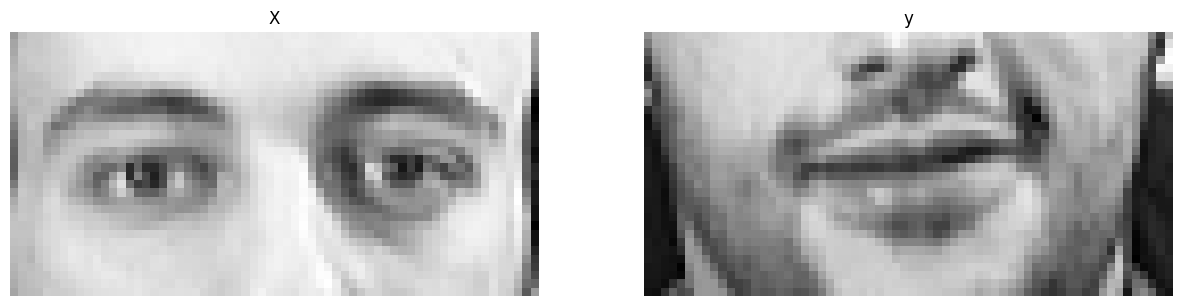

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
меняем размерность
Сейчас картинка 32x64
Выход нейронной сети одномерный и равный 32 * 64 = 2048. 

In [ ]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_test_n.shape

(80, 2048)

In [ ]:
y_train_n[0]

array([0.58264464, 0.677686  , 0.6859504 , ..., 0.45454547, 0.23966943,
       0.1983471 ], dtype=float32)

In [ ]:

y_train_n.shape

(320, 2048)

In [ ]:
# Подключаем необходимые модули и пакеты
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,  AveragePooling2D
 
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np
import keras

## 3.2. Создайте архитектуру для этой задачи

In [ ]:

from keras.layers import Dense, Flatten
from keras.models import Sequential


model = Sequential([
    Flatten(input_shape=(32, 64)),
    Dense(1024, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(32 * 64, activation='linear')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 2048)              2099200   
                                                                 
Total params: 5,246,976
Trainable params: 5,246,976
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train_n

array([[0.58264464, 0.677686  , 0.6859504 , ..., 0.45454547, 0.23966943,
        0.1983471 ],
       [0.56198347, 0.57438016, 0.58264464, ..., 0.21487603, 0.2107438 ,
        0.2231405 ],
       [0.607438  , 0.55785125, 0.54545456, ..., 0.30165288, 0.44214877,
        0.49586776],
       ...,
       [0.37603307, 0.38842976, 0.35123968, ..., 0.58677685, 0.59090906,
        0.60330576],
       [0.6404959 , 0.5247934 , 0.6280992 , ..., 0.2768595 , 0.2892562 ,
        0.2603306 ],
       [0.6322314 , 0.5371901 , 0.5206612 , ..., 0.46694216, 0.46280992,
        0.45454547]], dtype=float32)

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [ ]:

model.compile(optimizer='adam', loss='mse', metrics='mae')
 

In [ ]:
y_train_n

array([[0.58264464, 0.677686  , 0.6859504 , ..., 0.45454547, 0.23966943,
        0.1983471 ],
       [0.56198347, 0.57438016, 0.58264464, ..., 0.21487603, 0.2107438 ,
        0.2231405 ],
       [0.607438  , 0.55785125, 0.54545456, ..., 0.30165288, 0.44214877,
        0.49586776],
       ...,
       [0.37603307, 0.38842976, 0.35123968, ..., 0.58677685, 0.59090906,
        0.60330576],
       [0.6404959 , 0.5247934 , 0.6280992 , ..., 0.2768595 , 0.2892562 ,
        0.2603306 ],
       [0.6322314 , 0.5371901 , 0.5206612 , ..., 0.46694216, 0.46280992,
        0.45454547]], dtype=float32)

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
model.fit(X_train, y_train_n, epochs=300)


Epoch 1/300
10/10 [==============================] - 3s 137ms/step - loss: 0.1005 - mae: 0.2269
Epoch 2/300
10/10 [==============================] - 1s 92ms/step - loss: 0.0239 - mae: 0.1230
Epoch 3/300
10/10 [==============================] - 1s 86ms/step - loss: 0.0196 - mae: 0.1104
Epoch 4/300
10/10 [==============================] - 1s 85ms/step - loss: 0.0190 - mae: 0.1093
Epoch 5/300
10/10 [==============================] - 1s 80ms/step - loss: 0.0171 - mae: 0.1024
Epoch 6/300
10/10 [==============================] - 1s 85ms/step - loss: 0.0161 - mae: 0.0991
Epoch 7/300
10/10 [==============================] - 1s 83ms/step - loss: 0.0164 - mae: 0.0998
Epoch 8/300
10/10 [==============================] - 1s 87ms/step - loss: 0.0153 - mae: 0.0961
Epoch 9/300
10/10 [==============================] - 1s 86ms/step - loss: 0.0147 - mae: 0.0936
Epoch 10/300
10/10 [==============================] - 1s 86ms/step - loss: 0.0145 - mae: 0.0934
Epoch 11/300
10/10 [============================

## 3.5. Сделайте предсказания на тестовых данных

In [ ]:
preds = model.predict(X_test)

3/3 [==============================] - 0s 21ms/step


In [ ]:
X_test[1]

array([[0.3305785 , 0.30578512, 0.3305785 , ..., 0.3966942 , 0.37190083,
        0.28512397],
       [0.32231405, 0.32231405, 0.29752067, ..., 0.41322315, 0.338843  ,
        0.2603306 ],
       [0.3264463 , 0.30991736, 0.30578512, ..., 0.40495867, 0.36363637,
        0.27272728],
       ...,
       [0.59090906, 0.61157024, 0.6404959 , ..., 0.6363636 , 0.61157024,
        0.57438016],
       [0.59090906, 0.61157024, 0.6487603 , ..., 0.6404959 , 0.607438  ,
        0.5785124 ],
       [0.58677685, 0.60330576, 0.661157  , ..., 0.6363636 , 0.59917355,
        0.57438016]], dtype=float32)

In [ ]:
preds.shape

(80, 2048)

### 3.6. Посчитайте метрику качества на тестовых данных

In [ ]:
# Ваш код здесь

from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test_n)

0.06992738

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [ ]:
pred_test = preds.reshape(preds.shape[0], 32, 64)
pred_test.shape

(80, 32, 64)

Отрисуйте все предсказания.

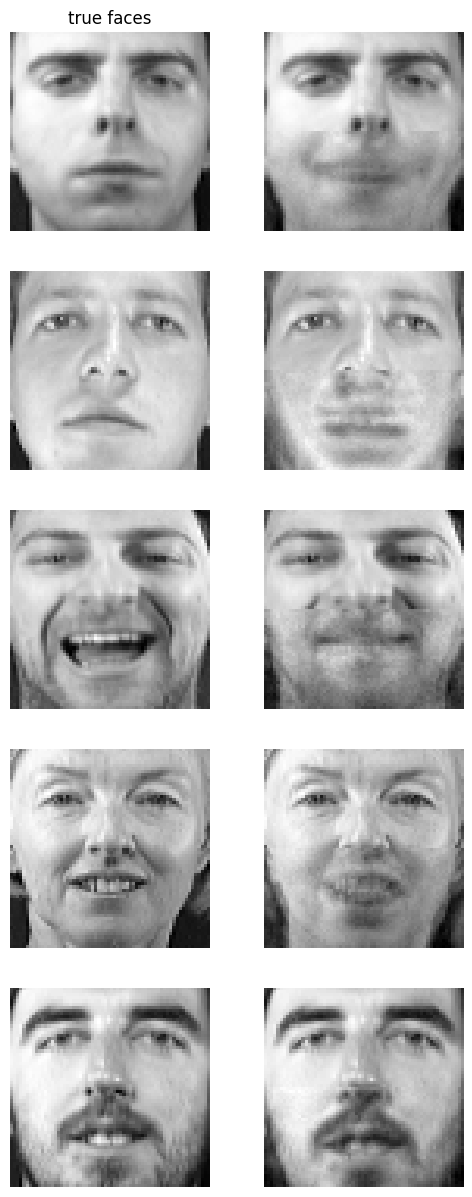

In [ ]:
n_faces = 5
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )